<a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_7_Vector_Geoprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY5021/2024/PD_logo.png" align=center alt="UL Geography logo"/>

# Vector Geoprocessing

So far, we've looked at different types of data, how geospatial data can be stored as vector coordinates with attributes, making sure we use a relevant coordinate reference system; and the file types used to store data in this format.

This brings us to a point where we can start doing geoprocessing, or analysis, of real geospatial data.

Of course, in order to actually work on real geospatial data, we need to know where to get some! So let's start by looking at some sources of vector geospatial data.

## 1. Sources of Vector Geospatial Data

There is no way we could list all sources here - there's just far, far too many. But we'll try to give a few that might be particularly useful or relevant. If you are interested in something which isn't here, ask! And we'll see what we can find for you.

Census

EPA

OSM

Met Éireann

OPW



## 2. Joining Vector and Attribute Data

Sometimes, you'll have one file containing the geometry of particular features, and a second file containing attribute data for those features. Can you use them together? 

Yes, easily. 

Let's demonstrate using data from the most recent Census of Population in Ireland. The most detailed data from this is published at *small area* level. Small areas are defined to 

The data at small areas level is published by the CSO, separately from the map of the small areas. However, the data does contain references indicating which small area each row of data is for. We can use this to join the data to the map. Let's start by reading in the map of the small areas. We can do this directly from the Government's Open Data portal:

In [44]:
small_areas = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/70a33cbb8bd7406da0d571be28624721_0/downloads/data?format=shp&spatialRefId=2157&where=1%3D1')
small_areas.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now, just because I know it will be needed, I'm going to rename the column with the reference ID for each small area, so that it has the same name as the equivalent column in the data file we're about to get.

In [45]:
small_areas = small_areas.rename(columns = {'SA_GUID_20':'GUID'})
small_areas.head()

,OBJECTID,GUID,SA_GUID__1,SA_PUB2011,SA_PUB2016,SA_PUB2022,SA_GEOGID_,SA_CHANGE_,SA_URBAN_A,SA_URBAN_1,...,ED_GAEILGE,ED_ID_STR,ED_PART_CO,COUNTY_COD,COUNTY_ENG,COUNTY_GAE,CSO_LEA,SHAPE_Leng,SHAPE_Area,geometry
0,1,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,017010016,017010016,017010016,A017010016,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,2123.346483,204944.170940,"POLYGON ((673146.546 677647.750, 673141.212 67..."
1,2,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,017010046,017010046,017010046,A017010046,4,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,2891.271018,288225.422281,"POLYGON ((673956.346 675276.804, 673941.585 67..."
2,3,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,017010037,017010037,017010037,A017010037,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,2436.985558,208426.926664,"POLYGON ((673720.644 676751.987, 673721.402 67..."
3,4,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,017010005,017010005,017010005,A017010005,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,2887.091306,348798.596379,"POLYGON ((671923.304 675704.149, 671917.909 67..."
4,5,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,017010036,017010036,017010036,A017010036,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,2844.409575,429349.096119,"POLYGON ((673711.843 677406.320, 673691.363 67..."


And now let's get the census data at Small Areas level from the CSO:

In [46]:
small_areas_data = pd.read_csv('https://www.cso.ie/en/media/csoie/census/census2022/SAPS_2022_Small_Area_270923.csv')

In [47]:
small_areas_data.head()

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_2C,T15_1_3C,T15_1_GE4C,T15_1_NSC,T15_1_TC,T15_2_BB,T15_2_OIC,T15_2_NO,T15_2_NS,T15_2_T
0,IE0,Ireland,Ireland,29610,28875,30236,31001,31686,32684,34092,...,594716,121594,46658,131326,1836728,1457883,73165,159866,145814,1836728
1,00b00ae4-229d-455d-84f1-d6face4876b1,147002002/02,147002002/02,2,6,3,2,6,5,4,...,20,3,1,20,116,88,4,4,20,116
2,03003797-1fcd-4fcf-8dde-b2188e3fb1db,167070005/01/167070001,167070005/01/167070001,1,3,2,1,1,3,1,...,43,16,4,7,119,93,1,17,8,119
3,06650182-eeaa-4c6c-847c-f85ddaf5361b,087064009/03,087064009/03,4,1,2,3,1,2,1,...,59,9,2,6,114,106,2,1,5,114
4,08e82f06-46ee-4141-aa07-79a793a12b27,087001012/02,087001012/02,1,1,0,2,1,0,1,...,26,3,0,2,86,80,1,3,2,86


Combining these takes just one simple line of code, asking to merge the small areas map file with the data, specifying that they should be merged based on the ```GUID``` columns in each file - the columns containing the reference ID for each small area.

In [48]:
small_areas = small_areas.merge(small_areas_data, on='GUID')
small_areas.head()

,OBJECTID,GUID,SA_GUID__1,SA_PUB2011,SA_PUB2016,SA_PUB2022,SA_GEOGID_,SA_CHANGE_,SA_URBAN_A,SA_URBAN_1,...,T15_1_2C,T15_1_3C,T15_1_GE4C,T15_1_NSC,T15_1_TC,T15_2_BB,T15_2_OIC,T15_2_NO,T15_2_NS,T15_2_T
0,1,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,017010016,017010016,017010016,A017010016,0,1,Carlow,...,37,3,2,7,114,94,2,10,8,114
1,2,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,017010046,017010046,017010046,A017010046,4,1,Carlow,...,47,2,2,5,120,107,2,4,7,120
2,3,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,017010037,017010037,017010037,A017010037,0,1,Carlow,...,30,7,0,4,132,106,3,17,6,132
3,4,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,017010005,017010005,017010005,A017010005,0,1,Carlow,...,30,13,7,31,144,111,1,3,29,144
4,5,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,017010036,017010036,017010036,A017010036,0,1,Carlow,...,27,3,2,3,87,69,2,14,2,87


Done. We can now plot the CSO data on a map - though we have to choose which column we want to plot. Here's a plot based on the column ```T1_1AGETT```, which, if you check the census data glossary, contains the total population of all ages in each small area.

<Axes: >

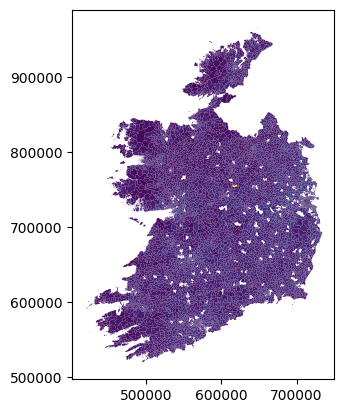

In [49]:
small_areas.plot(column='T1_1AGETT')

## 3. Attribute Calculations

Raw numbers can be useful, but often it's much more useful to combine them. We can calculate new attribute columns based on the data we have. For example, the above map shows the raw population, but it's often more useful to look at the population density, so let's calculate that.

To do this, we need two things: the population of each small area, and the area of each small area. We have the population numbers as the attribute column ```T1_1AGETT```; the area of each small area we can get from

## 4. Aggregating

Sometimes we're not necessarily interested in the full level of detail of a dataset, but rather want to aggregate the data for particular questions. To continue this example of census data, we might be more interested in using this population data to look at the total population of each urban area. 

We can do this by what's called *dissolving* the data - meaning merging all features which share some attribute in common. To look at the population of each urban area, we will dissolve the data by the ```SA_URBAN_1``` column, which contains the names of the urban area each small area is part of - if they are part of one. 

You can see in the ```head``` table above that the first couple of small areas in the list are part of Carlow town. The dissolve method will merge these all to a single feature - combining the polygon shapes for each small area in Carlow town. There will be a separate feature combining all the small areas in Limerick, and one for Galway, and one for Sligo...and so on. Each urban area named will get a single row combining all the data from all rows where that urban area was previously named.

Of course, that means there'll only be one cell to contain population data, rather than one cell for each small area - and the same for every other column. So we also have to specify how this will be handled. Since we want the total for each urban area, what we want to do is add up all the values for each urban area, and save the total in the relevant new row. So we'll specify ```sum``` as the ```aggfunc``` (aggregate function). 

```sum``` is only one option for ```aggfunc``` - you can also specify first, last, min, max, mean, median, or a custom function. But sum is what we need in this case.

This takes just one more line of code, so let's do it and then plot the result by quantiles, using a colour map varing from yellow to orange to red.


<Axes: >

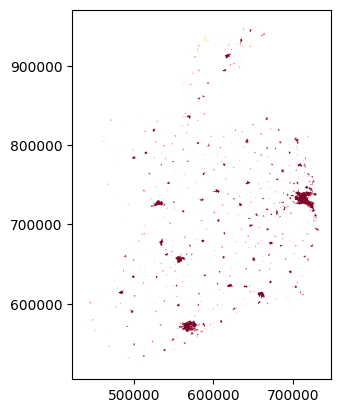

In [50]:
small_areas_urb = small_areas.dissolve(by='SA_URBAN_1', aggfunc='sum')
small_areas_urb.plot(column = 'T1_1AGETT', scheme='quantiles', cmap='YlOrRd')

The map shows all the urban areas, with the higher population centres in dark red - Dublin, Cork, Limerick, Galway - and ranging all the way to the faint yellow small towns throughout the country.

## 5. Buffering

Buffering means defining an area within a certain distance of a feature. For example, you might want to look at how many people live within 500m of a bus stop - in which case you could create a 500m buffer around the bus stop.

DO LIMERICK STOPS buffered over SA map of Limerick

Intersecting

In [52]:
import osmnx as ox

<Axes: >

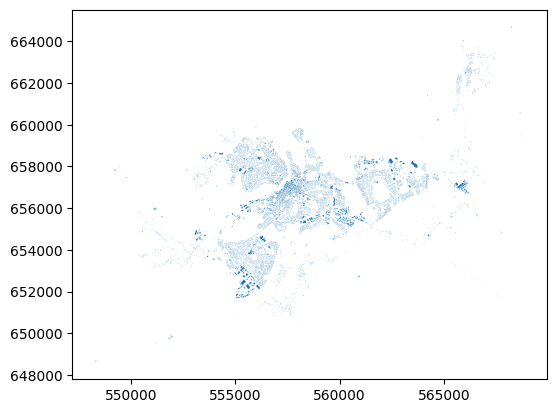

In [53]:
place = "Limerick, Ireland"
tags = {"building": True}
lk_buildings = ox.features_from_place(place, tags)
lk_buildings = lk_buildings[lk_buildings.geom_type == 'Polygon']
lk_buildings = lk_buildings.to_crs(2157)
lk_buildings.plot()

That's all the buildings in Limerick, pulled from OpenStreetMap by the library <a href='https://geoffboeing.com/2016/11/osmnx-python-street-networks/'>osmnx</a>. There's <a href='https://github.com/gboeing/osmnx-examples/tree/main/notebooks'>some great examples</a> of how to use this by the author Geoff Boeing.

<Axes: >

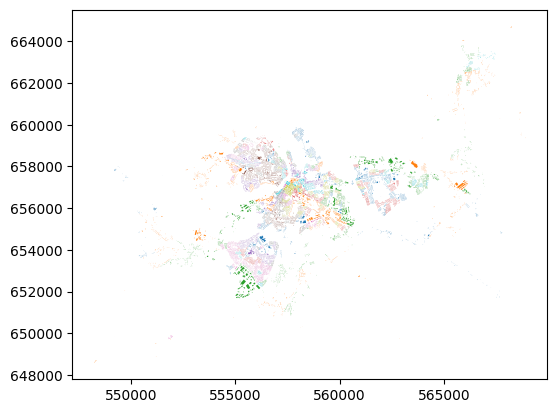

In [54]:
lk_buildings_sa = lk_buildings.overlay(small_areas, how='intersection')
lk_buildings_sa.plot(column="GUID")

Plotted by colour according to which CSO Small Area they're in.

That's the end of the Notebooks for this week - though there will be additional video walk-throughs of doing the same thing in QGIS.

Getting all the way to this point is a *huge* amount to cover in a short time, and please, don't expect to have learned it all. This is just an introduction, so that you've seen something once. You can refer back to any of the Notebooks at any time, you don't have to remember everything. I'm constantly looking up documentation to check how to do things again - I guarantee you I didn't write all this straight from memory. 

Much of this will take time to sink in - time, and using it. Your assignment is making one map - that will show that you *can* do this. It doesn't matter in the slightest if it's doing it while constantly referring back to guides. If you go on to make more maps, and analyse more data - well, then you'll get used to some of the tools for doing the particular things you use frequently. And if you're not doing it frequently, well, being able to find the right guides and information to let you do what you want to do is all the matters.

There will be a short survey on Brightspace just to ask about what kinds of things you'd be interested to look at, and I'll use the responses to that to give some more suggestions.